In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

In [2]:
# 人工データの生成
n = 1000
m = 50

np.random.seed(0)
t = np.random.rand(n) * np.pi
x = np.cos(t) - 0.2
y = np.sin(t) - 0.2
a = np.hstack([x[..., None], y[..., None]])

t = np.random.rand(n) * np.pi + np.pi
x = np.cos(t) + 0.2
y = np.sin(t) + 0.2
b = np.hstack([x[..., None], y[..., None]])

t = np.random.rand(n) * 2 * np.pi
r = np.random.rand(n) * 0.3
x = r * np.cos(t)
y = r * np.sin(t)
c = np.hstack([x[..., None], y[..., None]])

t = np.random.rand(n) * 2 * np.pi
x = 1.5 * np.cos(t)
y = 1.5 * np.sin(t)
d = np.hstack([x[..., None], y[..., None]])

e = np.random.rand(m, 2) * 2 - 1

x = np.concatenate([a, b, c, e]) + np.random.rand(3 * n + m, 2) * 0.1

[]

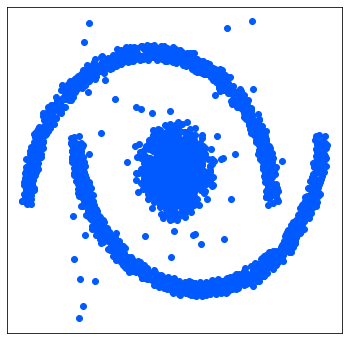

In [3]:
# データの図示
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(x[:, 0], x[:, 1], c='#005aff')
ax.set_xticks([])
ax.set_yticks([])

In [4]:
kmeans = KMeans(3, random_state=0, n_init='auto')
kmeans.fit(x)
kmeans.labels_.max()

2

[]

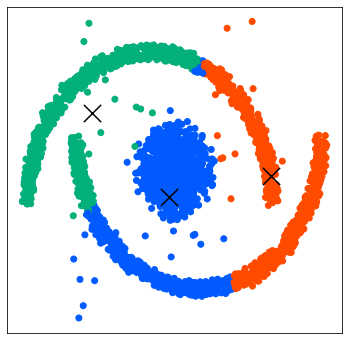

In [5]:
# 普通の k-means クラスタリングは失敗する
c = [['#005aff', '#ff4b00', '#03af7a'][c] for c in kmeans.labels_]
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(x[:, 0], x[:, 1], c=c)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='k', marker='x', s=300)
ax.set_xticks([])
ax.set_yticks([])

In [6]:
# K-NN グラフの構築
K = 50
edge = np.linalg.norm(x.reshape(1, -1, 2) - x.reshape(-1, 1, 2), axis=2).argsort(axis=1)[:, 1:K+1]

G = nx.Graph()
for i in range(len(x)):
    G.add_node(i)
for i in range(len(x)):
    for j in range(K):
        # ガウスカーネル重み
        G.add_edge(i, edge[i, j], weight=np.exp(-np.linalg.norm(x[i] - x[edge[i, j]]) ** 2 / 0.01))

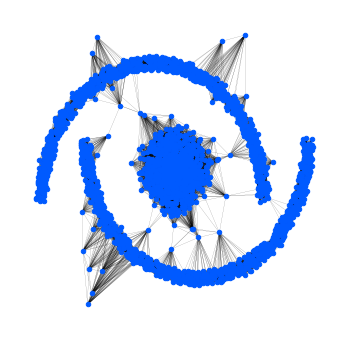

In [7]:
# グラフの図示
fig, ax = plt.subplots(figsize=(6, 6))
nx.draw(G, ax=ax, pos=x, node_size=20, node_color='#005aff', width=0.1)

In [8]:
evec = np.linalg.eigh(nx.laplacian_matrix(G).todense())[1] # ラプラシアンの固有ベクトル

[]

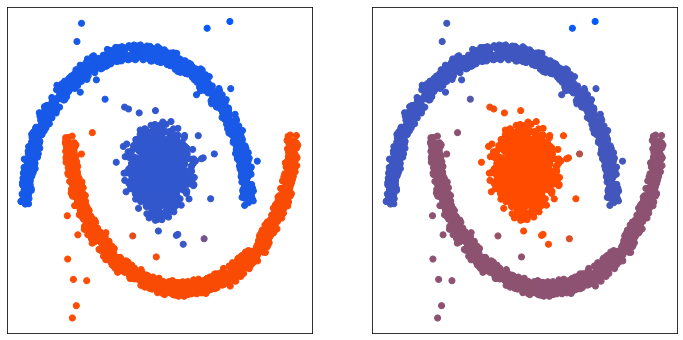

In [9]:
# 第二固有ベクトルと第三固有ベクトルでデータを色付け
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
v = evec[:, 1]
v = (v - v.min()) / (v.max() - v.min())
color = np.array([255, 75, 0]).reshape(3, 1) * v + np.array([0, 90, 255]).reshape(3, 1) * (1 - v)
ax.scatter(x[:, 0], x[:, 1], c=color.T/255)
ax.set_xticks([])
ax.set_yticks([])

ax = fig.add_subplot(1, 2, 2)
v = evec[:, 2]
v = (v - v.min()) / (v.max() - v.min())
color = np.array([255, 75, 0]).reshape(3, 1) * v + np.array([0, 90, 255]).reshape(3, 1) * (1 - v)
ax.scatter(x[:, 0], x[:, 1], c=color.T/255)
ax.set_xticks([])
ax.set_yticks([])

[]

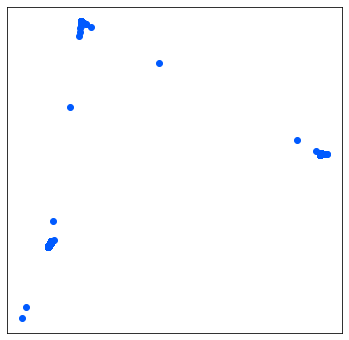

In [10]:
# 固有ベクトル座標系でのデータの図示
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(evec[:, 1], evec[:, 2], c='#005aff')
ax.set_xticks([])
ax.set_yticks([])

[]

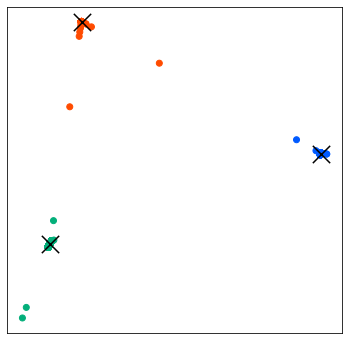

In [11]:
# 固有ベクトル座標系での k-means クラスタリング
kmeans = KMeans(3, random_state=0, n_init='auto')
kmeans.fit(evec[:, 1:3])

c = [['#005aff', '#ff4b00', '#03af7a'][c] for c in kmeans.labels_]

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(evec[:, 1], evec[:, 2], c=c)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='k', marker='x', s=300)
ax.set_xticks([])
ax.set_yticks([])

[]

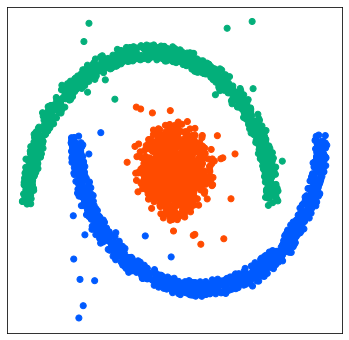

In [12]:
# 元の座標系で結果を図示
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(x[:, 0], x[:, 1], c=c)
ax.set_xticks([])
ax.set_yticks([])